#### Carregamento de dados

In [1]:
%run bot_libraries.ipynb

In [2]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [3]:
%run tratamento_de_dados.ipynb

#### Gráfico 'Open', 'High', 'Low', 'Close'

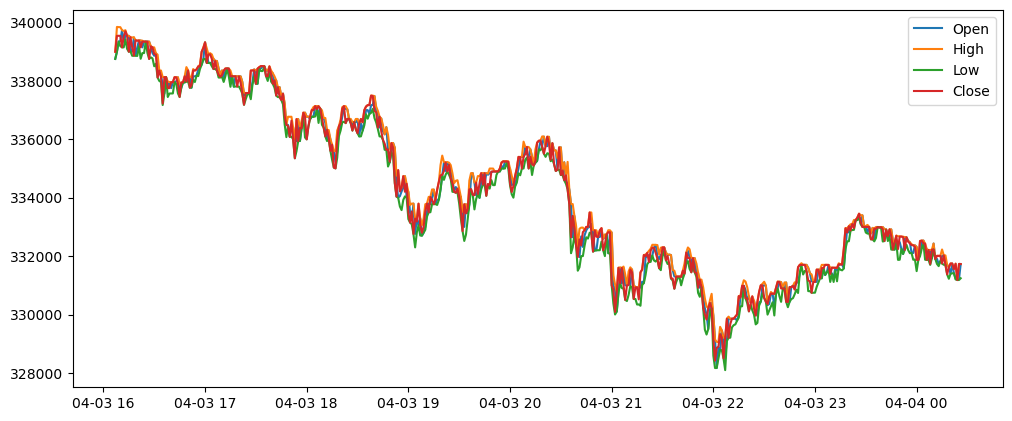

In [4]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

##### [5.1.11. SAR - Parabolic SAR][[1](https://www.metatrader5.com/pt/terminal/help/indicators/trend_indicators/psar)][[2](https://www.investopedia.com/trading/introduction-to-parabolic-sar/)]

In [13]:
real = talib.SAR(high, low, acceleration=0.02, maximum=0.2)

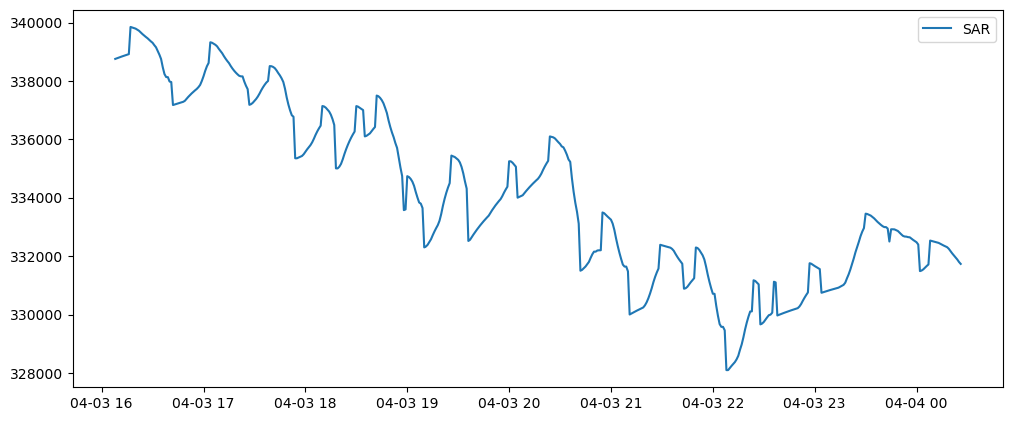

In [14]:
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, real)
plt.legend(line, data_0.columns)

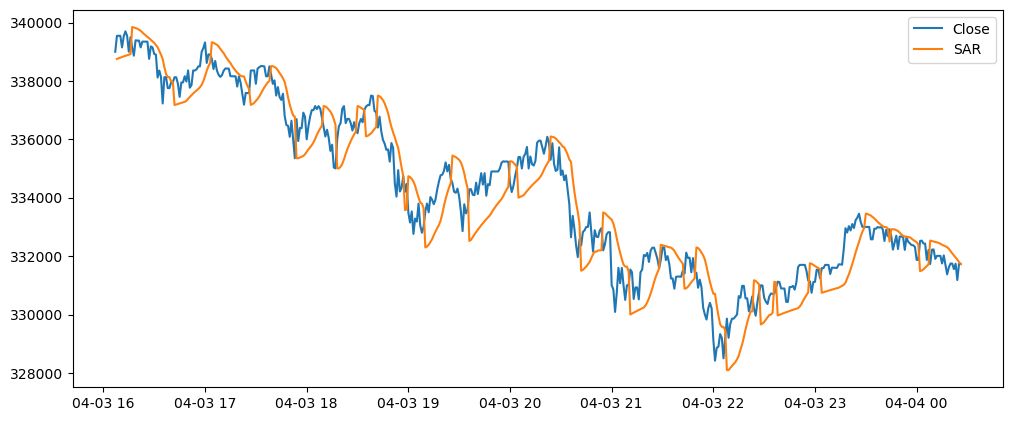

In [15]:
data_metric = pd.DataFrame({"SAR": real})

data_0 = data_metric[["SAR"]]
plt.figure(figsize=(12,5), dpi=100)



#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']
line_p = plt.plot(data_p.index, data_p)
# plt.legend(line_p, data_p.columns)


line = plt.plot(data_0.index, data_0)
plt.legend((*line_p, *line), (*data_p.columns, *data_0.columns))
plt.show()

#### Dataframe

In [16]:
data_metric = pd.DataFrame()
for i in range(len(data)):
    data_metric = data_metric.append({"Close": data['Close'][i], "SAR": real[i]}, ignore_index = True)

In [17]:
data_metric_drop = data_metric.dropna().reset_index(drop = True)
data_metric_drop

,Close,SAR
0,339546.0000000000,338755.0000000000
1,339546.0000000000,338776.9000000000
2,339546.0000000000,338798.3620000000
3,339150.0000000000,338819.3947600000
4,339524.0000000000,338840.0068648000
...,...,...
494,331555.0000000000,332023.0494656480
495,331740.0000000000,331959.1255083961
496,331181.0000000000,331883.3129575565
497,331732.0000000000,331799.0354026497


#### Loop de descisão de compra com a métrica escolhida